Entrez la taille de la constellation QAM (4, 16, 32, 64, 128, 512, 1024, 2048, 4096) : 32
Entrez le symbole de déclenchement (format : I,Q) : -5,-5
Génération de la constellation QAM et du tableau en cours...


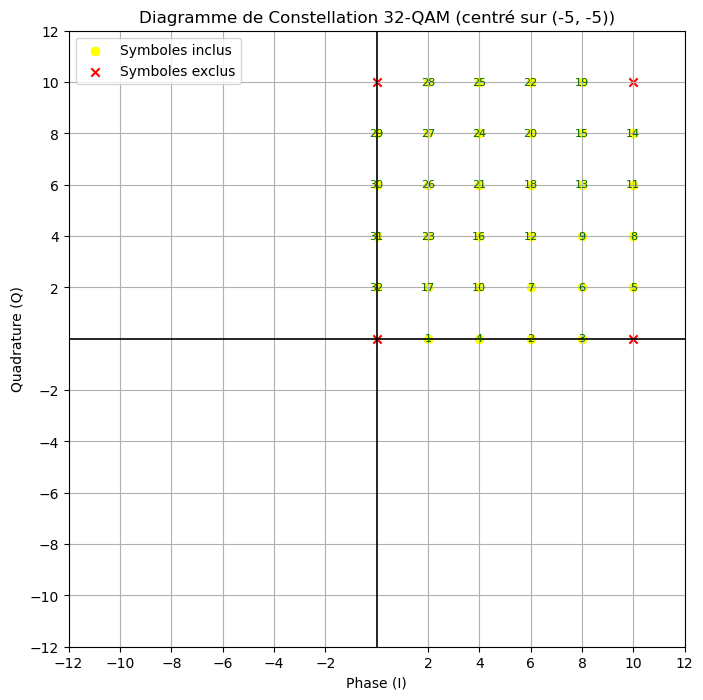

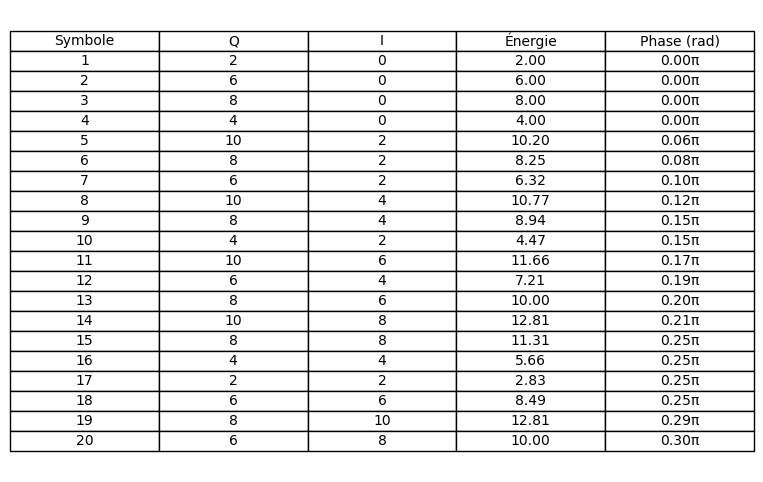

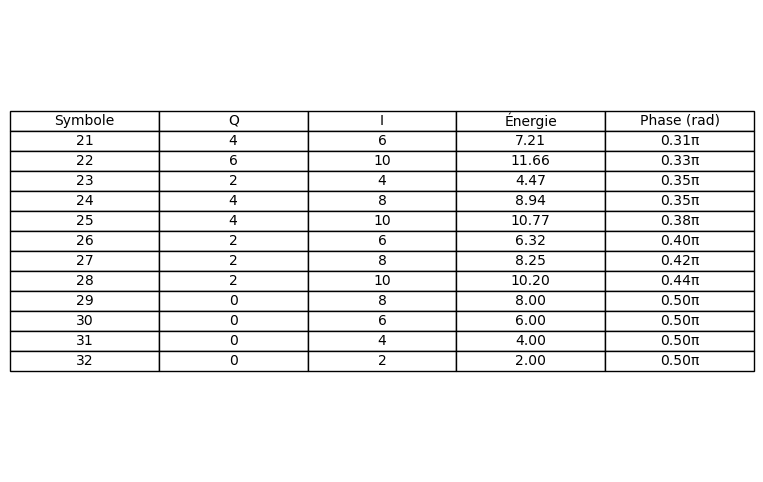

Diagramme et tableau affichés avec succès !


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math

def generer_constellation_qam(taille_qam, points_exclus):
    longueur_cote = int(np.sqrt(taille_qam))

    if taille_qam == 32:
        longueur_x = 6
        longueur_y = 6
    elif taille_qam == 128:
        longueur_x = 12
        longueur_y = 12
    elif taille_qam == 512:
        longueur_x = 24
        longueur_y = 24
    elif taille_qam == 2048:
        longueur_x = 46
        longueur_y = 46
    else:
        longueur_x = longueur_cote
        longueur_y = longueur_cote

    points = np.array([(x, y) for x in range(-longueur_x + 1, longueur_x, 2)
                       for y in range(-longueur_y + 1, longueur_y, 2)])

    points_exclus_liste = []
    if points_exclus > 0:
        taille_carre = int(np.sqrt(points_exclus // 4))
        for i in range(taille_carre):
            for j in range(taille_carre):
                points_exclus_liste.extend([
                    (longueur_x - 1 - 2 * i, longueur_y - 1 - 2 * j),
                    (-longueur_x + 1 + 2 * i, longueur_y - 1 - 2 * j),
                    (longueur_x - 1 - 2 * i, -longueur_y + 1 + 2 * j),
                    (-longueur_x + 1 + 2 * i, -longueur_y + 1 + 2 * j)
                ])
        points_exclus_liste = np.array(points_exclus_liste)

        masque = np.ones(len(points), dtype=bool)
        for point_exclu in points_exclus_liste:
            masque &= ~np.all(points == point_exclu, axis=1)
        points = points[masque]

    return points, points_exclus_liste

def tracer_constellation_qam(taille_qam, symbole_declenchement):
    exclusions = {32: 4, 128: 16, 512: 64, 2048: 196}
    points_exclus = exclusions.get(taille_qam, 0)

    points, points_exclus_liste = generer_constellation_qam(taille_qam, points_exclus)

    # Décalage des points pour centrer sur le symbole de déclenchement
    points = points - np.array(symbole_declenchement)

    energie = np.sqrt(points[:, 0] ** 2 + points[:, 1] ** 2)
    phase = np.arctan2(points[:, 1], points[:, 0])
    phase = (phase + 2 * np.pi) % (2 * np.pi)
    phase_pi = phase / np.pi

    indices_tri = np.argsort(phase)
    points = points[indices_tri]
    energie = energie[indices_tri]
    phase_pi = phase_pi[indices_tri]

    # Numérotation des symboles
    numeros_symboles = np.arange(1, len(points) + 1)

    plt.figure(figsize=(10, 8))
    plt.scatter(points[:, 0], points[:, 1], color='yellow', label='Symboles inclus')
    
    # Affichage des numéros
    for i, (x, y) in enumerate(points):
        plt.text(x, y, f'{numeros_symboles[i]}', fontsize=8, ha='center', va='center', color='darkgreen')
    
    if len(points_exclus_liste) > 0:
        points_exclus_liste = points_exclus_liste - np.array(symbole_declenchement)
        plt.scatter(points_exclus_liste[:, 0], points_exclus_liste[:, 1], color='red', marker='x', label='Symboles exclus')

    plt.grid(True)
    plt.title(f'Diagramme de Constellation {taille_qam}-QAM (centré sur {symbole_declenchement})')
    plt.xlabel('Phase (I)')
    plt.ylabel('Quadrature (Q)')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()

    valeur_max = np.max(np.abs(points)) + 2
    graduations = np.arange(-valeur_max, valeur_max + 1, 2)
    plt.xticks(graduations[graduations != 0])
    plt.yticks(graduations[graduations != 0])

    plt.axhline(0, color='black', linewidth=1.2)
    plt.axvline(0, color='black', linewidth=1.2)

    plt.show()

    numeros_symboles = np.arange(1, len(points) + 1)
    taille_bloc = 20
    nombre_blocs = math.ceil(len(points) / taille_bloc)

    for i in range(nombre_blocs):
        indice_debut = i * taille_bloc
        indice_fin = min((i + 1) * taille_bloc, len(points))
        figure_tableau = plt.figure(figsize=(8, 6))
        axe_tableau = figure_tableau.add_subplot(1, 1, 1)
        axe_tableau.axis('off')

        donnees_tableau = [[num, q, i, f"{e:.2f}", f"{p:.2f}π"] for num, (q, i), e, p in
                           zip(numeros_symboles[indice_debut:indice_fin], points[indice_debut:indice_fin],
                               energie[indice_debut:indice_fin], phase_pi[indice_debut:indice_fin])]

        tableau = axe_tableau.table(cellText=donnees_tableau,
                                    colLabels=["Symbole", "Q", "I", "Énergie", "Phase (rad)"],
                                    loc="center", cellLoc="center", colWidths=[0.2, 0.2, 0.2, 0.2, 0.2])
        tableau.auto_set_font_size(False)
        tableau.set_fontsize(10)
        tableau.scale(1.2, 1.2)

        plt.show()

# Entrée utilisateur
taille_qam = int(input("Entrez la taille de la constellation QAM (4, 16, 32, 64, 128, 512, 1024, 2048, 4096) : "))
symbole_declenchement = input("Entrez le symbole de déclenchement (format : I,Q) : ")
symbole_declenchement = tuple(map(int, symbole_declenchement.split(',')))

tailles_valides = [4, 16, 32, 64, 128, 512, 1024, 2048, 4096]
if taille_qam in tailles_valides:
    print("Génération de la constellation QAM et du tableau en cours...")
    tracer_constellation_qam(taille_qam, symbole_declenchement)
    print("Diagramme et tableau affichés avec succès !")
else:
    print(f"Taille de QAM invalide. Veuillez choisir parmi : {tailles_valides}.")


Entrez le SNR en dB (par exemple, 10) : 4
Génération de la constellation QAM avec bruit en cours...


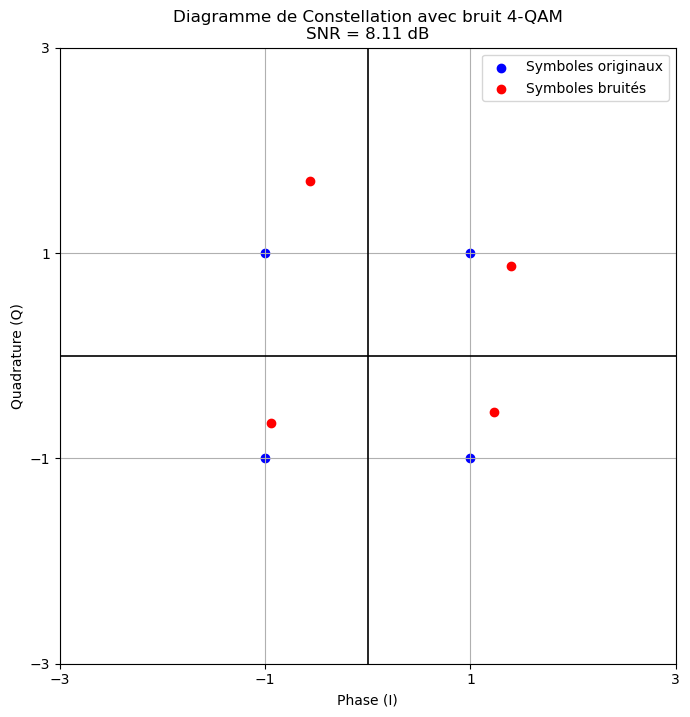

Diagramme de constellation avec bruit et SNR = 4.0 dB affiché avec succès !


In [19]:
def ajouter_bruit(points, snr_db):
    """
    Ajoute du bruit à une constellation QAM avec un SNR donné.
      points : Les points de la constellation QAM (I, Q).
      snr_db : Le rapport signal sur bruit en décibels (SNR).
    """
    # Calcul du bruit (bruit gaussien)
    puissance_signal = np.mean(np.square(np.abs(points)))  # Calcul de la puissance moyenne du signal
    snr = 10 ** (snr_db / 10)  # Conversion du SNR en facteur linéaire
    puissance_bruit = puissance_signal / snr  # Puissance du bruit
    ecart_type_bruit = np.sqrt(puissance_bruit)  # Écart-type du bruit

    # Ajouter du bruit Gaussien avec la moyenne nulle
    bruit = np.random.normal(0, ecart_type_bruit, points.shape)
    points_bruites = points + bruit  # Ajouter le bruit aux points de la constellation

    return points_bruites

def calculer_snr(points_original, points_bruites):
    """
    Calcule le rapport signal sur bruit (SNR) en décibels.
      points_original : Les points originaux de la constellation.
      points_bruites : Les points après ajout de bruit.
    """
    erreur = points_bruites - points_original  # Calcul de l'erreur entre les points bruits et originaux
    puissance_signal = np.mean(np.square(np.abs(points_original)))  # Puissance du signal
    puissance_bruit = np.mean(np.square(np.abs(erreur)))  # Puissance du bruit
    snr = 10 * np.log10(puissance_signal / puissance_bruit)  # Calcul du SNR en dB
    return snr

def tracer_constellation_bruitee(taille_qam, snr_db):
    """
    Tracer la constellation QAM avec bruit et calculer le SNR.
    """
    # Générer la constellation sans bruit
    points, _ = generer_constellation_qam(taille_qam, 0)

    # Ajouter du bruit à la constellation
    points_bruites = ajouter_bruit(points, snr_db)

    # Calculer le SNR
    snr = calculer_snr(points, points_bruites)

    # --- Diagramme de Constellation avec bruit ---
    plt.figure(figsize=(8, 8))
    plt.scatter(points[:, 0], points[:, 1], color='blue', label='Symboles originaux')  # Symboles originaux
    plt.scatter(points_bruites[:, 0], points_bruites[:, 1], color='red', label='Symboles bruités')  # Symboles bruités
    plt.grid(True)
    plt.title(f'Diagramme de Constellation avec bruit {taille_qam}-QAM\nSNR = {snr:.2f} dB')
    plt.xlabel('Phase (I)')
    plt.ylabel('Quadrature (Q)')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()

    # Définir les graduations de l'axe
    valeur_max = np.max(np.abs(points)) + 2
    graduations = np.arange(-valeur_max, valeur_max + 1, 2)
    plt.xticks(graduations[graduations != 0])
    plt.yticks(graduations[graduations != 0])

    # Ajouter des lignes pour les axes
    plt.axhline(0, color='black', linewidth=1.2)
    plt.axvline(0, color='black', linewidth=1.2)

    plt.show()

# Demander la taille de la constellation QAM et le SNR
snr_db = float(input("Entrez le SNR en dB (par exemple, 10) : "))

# Vérifier la validité de la taille QAM
tailles_valides = [4, 16, 32, 64, 128, 512, 1024, 2048, 4096]
if taille_qam in tailles_valides:
    print("Génération de la constellation QAM avec bruit en cours...")  # Message d'attente
    tracer_constellation_bruitee(taille_qam, snr_db)
    print(f"Diagramme de constellation avec bruit et SNR = {snr_db} dB affiché avec succès !")
else:
    print(f"Taille de QAM invalide. Veuillez choisir parmi : {tailles_valides}.")
